# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [18]:
data = image_dataset_from_directory('/content/drive/MyDrive/data')

Found 1658 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch = data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

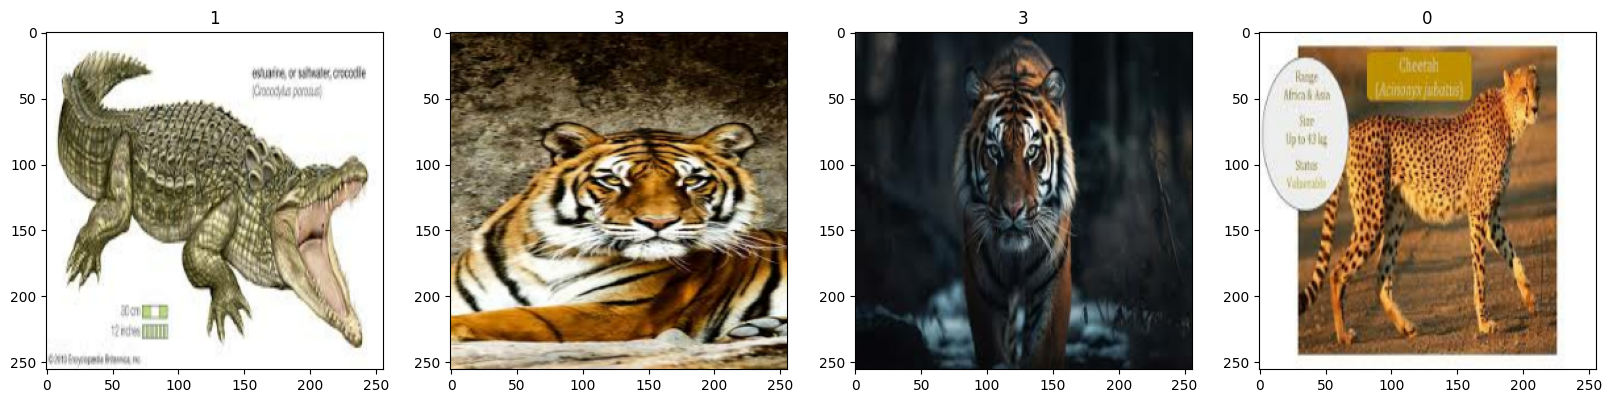

In [21]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [22]:
data = data.map(lambda x,y: (x/255.0,y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [23]:
train_size = int(len(data) * 0.9)

ds_train = data.take(train_size)
ds_test = data.skip(train_size)

**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [24]:
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
  MaxPooling2D((2, 2)),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
  Conv2D(64, (3, 3), activation='relu'),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(4, activation='softmax')
])

**Q.6** Compile your model

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [26]:
model.fit(ds_train, epochs = 10)

Epoch 1/10
46/46 [==============================] - 15s 221ms/step - loss: 1.7859 - accuracy: 0.3383
Epoch 2/10
46/46 [==============================] - 13s 251ms/step - loss: 1.1479 - accuracy: 0.5054
Epoch 3/10
46/46 [==============================] - 14s 256ms/step - loss: 0.9964 - accuracy: 0.5944
Epoch 4/10
46/46 [==============================] - 13s 251ms/step - loss: 0.7096 - accuracy: 0.7425
Epoch 5/10
46/46 [==============================] - 14s 256ms/step - loss: 0.4997 - accuracy: 0.8179
Epoch 6/10
46/46 [==============================] - 13s 248ms/step - loss: 0.2819 - accuracy: 0.9144
Epoch 7/10
46/46 [==============================] - 13s 253ms/step - loss: 0.1386 - accuracy: 0.9545
Epoch 8/10
46/46 [==============================] - 13s 246ms/step - loss: 0.1045 - accuracy: 0.9735
Epoch 9/10
46/46 [==============================] - 13s 251ms/step - loss: 0.0596 - accuracy: 0.9891
Epoch 10/10
46/46 [==============================] - 14s 261ms/step - loss: 0.0593 - accura

**Q.8** Test your code with test set

In [27]:
loss, accuracy = model.evaluate(ds_test)

6/6 [==============================] - 12s 30ms/step - loss: 0.1268 - accuracy: 0.9624


In [28]:
# Do not change this code
if accuracy>=0.85:
  print("Congratulations, CNN assignment complete!!")
else:
  print("Try again, not enough accuracy")

Congratulations, CNN assignment complete!!


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increase the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than its a easy task, happy learning!!**